<a href="https://colab.research.google.com/github/EBer-wtf/danger/blob/main/model_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 模型預測
* 本範例沿用上週課程
    * 請上傳訓練資料train_Data.xlsx
* 本範例請見步驟(6)預測資料
    * 請上傳預測資料predict_sample.csv






## (1) 讀檔

In [ ]:
import pandas as pd
import re

# ===== 讀取 Excel =====
excel_file_path = 'train_Data.xlsx'
df = pd.read_excel(excel_file_path)

In [ ]:
df.sample(5)

,ID,label,content_cleaned
323,324,0,A益比喜銷售AAA000兒童機能營養凍。保健品研發博士國考營養師保健品工程師三師共同監製研發...
192,193,0,A000AAA。0號。含營養師線上諮詢專為關心健康的您打造我們堅持使用天然成分幫助您維持消化...
431,432,0,醫美等級康健妍蘋果肌膠原粉兩入000包擁有豐富的膠原蛋白讓您的肌膚水潤有彈性展現青春活力。每...
394,395,1,母乳營養給寶寶最好的保護含有母乳寡糖、母乳蛋白質、母乳益菌是給寶寶最好的營養與保護。乳糖幫助...
1406,1407,0,桂格優成長素。將繼續用心陪伴孩子健康成長每一步。為什麼家長都選擇桂格優成長素。台灣百位小兒科...


## (2) 分割訓練集與測試集

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['content_cleaned']
y = df['label']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=100,  # 100 samples for the test set
    stratify=y,     # Stratify based on the 'label' column
    random_state=42 # for reproducibility
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of labels in y_train:")
display(y_train.value_counts())

print("\nDistribution of labels in y_test:")
display(y_test.value_counts())

Shape of X_train: (1442,)
Shape of X_test: (100,)
Shape of y_train: (1442,)
Shape of y_test: (100,)

Distribution of labels in y_train:


,count
label,
1,721
0,721



Distribution of labels in y_test:


,count
label,
0,50
1,50


## (3A) 文本前處理：分詞

In [ ]:
# Install Jieba for Chinese word segmentation
!pip install jieba

In [ ]:
import jieba

def segment_text(text):
    if isinstance(text, str):
        # Perform word segmentation
        seg_list = jieba.cut(text, cut_all=False) # cut_all=False for accurate mode
        return " ".join(seg_list)
    else:
        return ""

# Apply word segmentation to the cleaned content in both training and testing sets
X_train_segmented = X_train.apply(segment_text)
X_test_segmented = X_test.apply(segment_text)

print("Original X_train sample:")
display(X_train.head())

print("\nSegmented X_train sample:")
display(X_train_segmented.head())

print("\nOriginal X_test sample:")
display(X_test.head())

print("\nSegmented X_test sample:")
display(X_test_segmented.head())

/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:44: SyntaxWarning: invalid escape sequence '\.'
  re_han_default = re.compile("([\u4E00-\u9FD5a-zA-Z0-9+#&\._%\-]+)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/__init__.py:46: SyntaxWarning: invalid escape sequence '\s'
  re_skip_default = re.compile("(\r\n|\s)", re.U)
/usr/local/lib/python3.12/dist-packages/jieba/finalseg/__init__.py:78: SyntaxWarning: invalid escape sequence '\.'
  re_skip = re.compile("([a-zA-Z0-9]+(?:\.\d+)?%?)")
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.545 seconds.
DEBUG:jieba:Loading model cost 0.545 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


Original X_train sample:


,content_cleaned
895,打破年齡設限‧看見青春立體。0AAA。撐補成分歲月細節一股腦地顯現在外表。支‧撐‧力000A...
187,兒童專科舒緩情緒消化提升敏感調理全台最足量健康食品變聰明變聰明的零食天然增加學習效率針對敏弱...
1440,0%增稠000%香料000%色素。維持消化道機能。日本專利膳食纖維多元益生菌。黃金比例口感細...
601,小胸救星升AAA不難。小胸&大胸女孩是不是有以下煩惱。撐不起衣服。哺乳後ㄋㄋ大縮水。美型拉提...
69,便秘救星、減肥聖品、減肥瘦瘦水、便祕必喝、便祕必喝、被封是減肥&解便秘聖品、便祕必喝、減肥聖...



Segmented X_train sample:


,content_cleaned
895,打破 年齡 設限 ‧ 看見 青春 立體 。 0AAA 。 撐補 成分 歲 月 細節 一股 腦...
187,兒童 專科 舒緩 情緒 消化 提升 敏感 調理 全台 最 足量 健康 食品 變聰明 變聰明 ...
1440,0% 增稠 000% 香料 000% 色素 。 維持 消化道 機能 。 日本 專利 膳食 纖...
601,小胸 救星 升 AAA 不難 。 小胸 & 大胸 女孩 是不是 有 以下 煩惱 。 撐 不起...
69,便秘 救星 、 減肥 聖品 、 減 肥瘦 瘦水 、 便 祕 必 喝 、 便 祕 必 喝 、 ...



Original X_test sample:


,content_cleaned
1078,享受尚好生活。享食尚健字號甘甘好活力加值組黃金組合甘甘好膠囊衛部健食字第AAA000號專為您...
1318,超模之鑰。防溢方案。官網000下殺000典悅生醫AAA搭配營養素幫助調節生理機能維持身體健康...
1348,商品。0益生菌益生質互利共生。0項全球專利後生元調整體質。幫助維持消化道機能。0色素、0人工...
89,抗藍光護眼軟糖。不如就給他吃抗藍光軟糖吧。吸收強光、過濾藍光、保護眼睛。適合族群:長時間盯著...
718,體力、美力一次擁有。0種AAA群完整組合。0合000美妍配方讓妳青春好自信。長效緩釋持續釋放...



Segmented X_test sample:


,content_cleaned
1078,享受 尚好 生活 。 享食 尚健字號 甘甘好 活力 加值 組黃金 組合 甘甘好 膠囊 衛部 ...
1318,超模 之 鑰 。 防溢 方案 。 官網 000 下 殺 000 典悅 生醫 AAA 搭配 營...
1348,商品 。 0 益生菌 益生質 互利 共生 。 0 項 全球 專利後生 元 調整 體質 。 幫...
89,抗藍光護 眼軟 糖 。 不如 就給 他 吃 抗藍光 軟糖 吧 。 吸收 強光 、 過濾 藍光...
718,體力 、 美力 一次 擁有 。 0 種 AAA 群 完整 組合 。 0 合 000 美妍 配...


## (3B) 前處理：特徵

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with min_df=2 to only include terms that appear at least twice
vectorizer = CountVectorizer(min_df=2)

# Learn the vocabulary and transform the training data
X_train_bow = vectorizer.fit_transform(X_train_segmented)

# Transform the testing data using the learned vocabulary
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (1442, 5191)
Shape of X_test_bow: (100, 5191)


## (4) 模型訓練

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define the MLP model
model = Sequential([
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy']) # Monitor accuracy

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
# Convert y_train and y_test to numerical dtype
y_train_numerical = y_train.astype(int)
y_test_numerical = y_test.astype(int)

# Convert sparse matrix to dense for Keras Dense layer compatibility
X_train_bow_dense = X_train_bow.todense()


history = model.fit(X_train_bow_dense, y_train_numerical, # Use dense input for training
                    epochs=1, # Number of training epochs
                    shuffle=False,
                    batch_size=128, # Batch size
                    validation_split=0.3) # Use 30% of training data for validation

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6406 - loss: 0.6618 - val_accuracy: 0.7875 - val_loss: 0.6221


## (5) 模型評估

In [ ]:
# Evaluate the model on the test set
# Convert y_test to numerical dtype if it hasn't been already
y_test_numerical = y_test.astype(int)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()


loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical) # Use dense input for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8495 - loss: 0.6178 

Test Loss: 0.6189
Test Accuracy: 0.8400


In [ ]:
#新增
import numpy as np

# Convert sparse matrix to dense for prediction
X_test_bow_dense = X_test_bow.todense()

# Get the predicted probabilities
y_pred_prob = model.predict(X_test_bow_dense)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob >= 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


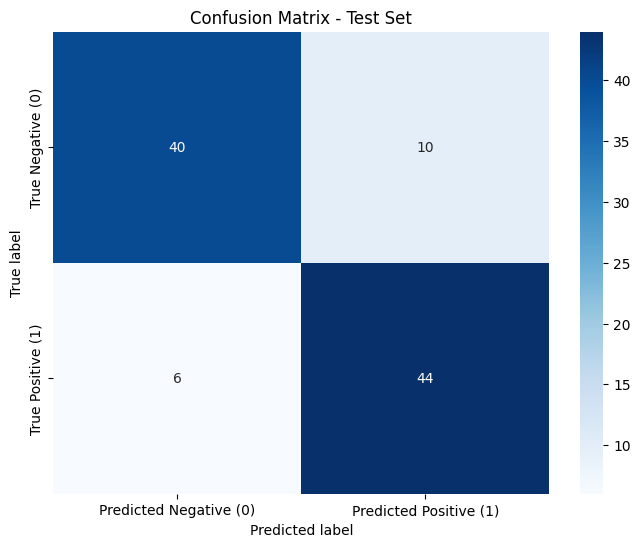

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_numerical, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        50
           1       0.81      0.88      0.85        50

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



In [ ]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

[True Negative]
Text: 豐富蛋白質幫助體力恢復。含天然膠原蛋白為持肌膚青春美麗。製作過程不加一滴水。健康低卡純天然無任何添加物每包僅有000卡。低普林。痛風患者可酌量使用。
True Label: 0
Pred Label: 0

[True Positive]
Text: 遠離學校病菌大流行打造寶貝安心體質。活化體內防護軍快速抵禦壞菌。維安升級護、安全感。體內好菌身體敏感未到率。這些特殊時刻校園非常時期寒流來襲日夜溫差敏感源一堆身體敏感。全球非常時期超強守護罩增加前線保衛小衛兵。臨床實證狀況天數大幅縮短為000。天。服用。圖表。調節生理機能。0%。臨床實證幫助調整體質上升。天安全下莊強大保護罩盾牌有效降低。小孩服用以降低敏感。防護班上好多同學沒去學校。防護罩換季時。
True Label: 1
Pred Label: 1

[False Negative]
Text: 減肥產品飽感減少食慾。每日一顆輕鬆瘦。新陳代謝循環較慢者。服用後會降低食慾體重下降容易接受飲食控制從而達到體重的減輕。
True Label: 1
Pred Label: 0

[False Positive]
Text: 馬甲纖纖飲專為現代女性打造搭配特殊配方幫助調節生理機能維持消化道健康。輕鬆享受每一餐讓你的身體更加輕盈活力。
True Label: 0
Pred Label: 1

[Random]
Text: 豐富蛋白質幫助體力恢復。含天然膠原蛋白為持肌膚青春美麗。製作過程不加一滴水。健康低卡純天然無任何添加物每包僅有000卡。低普林。痛風患者可酌量使用。
True Label: 0
Pred Label: 0


## (6) 預測資料⭐️⭐️⭐️
* 上傳預測題目 predict_sample.csv
    * ID
    * content_cleaned
* 前處理需要與預測資料一致
* 使用model.predict預測結果，並輸出為groupX_NAME_answer_v0.csv
    * X 組別
    * NAME 名字或代碼
    * v0 版本

In [ ]:
import pandas as pd

# === 載入測試資料 ===
# 假設檔案放在同一個資料夾底下
predict_df = pd.read_csv("predict_sample.csv")
predict_df

,ID,content_cleaned
0,1,拉蓓。閃纖舒眠益生菌凍每日一條輕鬆入口幫助調節生理機能維持腸道健康。富含膳食纖維促進消化道蠕...
1,2,天堂椒可以騙大腦的交感神經它可以騙大腦增加我們的靜態能量消耗。0瘦000公斤瘦了奶奶還變大。
2,3,每日一包堅果乾保持身體健康內含000種無調味堅果可加入牛奶或優格當早餐食用內為小包裝設計方便...
3,4,惠氏啟賦啟賦水解。0含豐富營養素有助於維持消化道機能促進腸道蠕動讓您每天輕鬆調節生理機能享受...
4,5,這款桔梗水梨汁有鎮咳抗炎以及抗氧化功效。氣管敏感朋友的救星。尤其特別適合容易喉嚨敏感、氣管、...
...,...,...
95,96,\。A鱸魚精讓你輕鬆補充營養活力滿滿。術後補養首選。每天來一包。金目鱸魚精華。國家健康食品。...
96,97,學習領先關鍵。專為兒童設計。迷你可咀嚼軟膠囊好吞又好咬。無色素無人工香料寶貝補充好安心。
97,98,想豐胸促進胸部成長刺激女性荷爾蒙幫助發育促進乳腺管增長住膠原蛋白增生調理內分泌平衡荷爾蒙美肌...
98,99,買000送000拉蓓燉雞精精煉純雞搭配獨特配方簡單烹煮優雅濃郁的湯頭讓您享受美味的雞肉風味。...


In [ ]:
# ====== 1. 對預測資料進行斷詞(如同3A) ======
predict_df["content_segmented"] = predict_df["content_cleaned"].apply(segment_text)

# ====== 2. 使用訓練過的 vectorizer 進行特徵轉換(如同3B) ======
# 只能用 transform，不能用 fit 或 fit_transform
# 因為 vectorizer 的詞彙表已經在訓練階段確定，不能改變
X_predict_bow = vectorizer.transform(predict_df["content_segmented"])

# ====== 3. 轉換成 Dense Tensor (如果4有進行此步驟) ======
X_predict_dense = X_predict_bow.todense()

# ====== 4. 使用訓練好的模型進行預(假設閾值為0.5) ======
y_proba = model.predict(X_predict_dense).ravel()   # 機率 0~1
y_pred = (y_proba >= 0.5).astype(int)              # 二元分類結果 0/1

# ====== 5. 輸出成 CSV 檔案 ======
output_df = pd.DataFrame({
    "ID": predict_df["ID"],
    "label": y_pred
})

output_file = "groupX_NAME_answer_v0.csv"
output_df.to_csv(output_file, index=False, encoding="utf-8-sig")
output_df

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,ID,label
0,1,0
1,2,1
2,3,0
3,4,0
4,5,1
...,...,...
95,96,0
96,97,0
97,98,1
98,99,0
